# Preprocess


In [35]:
using Statistics, LinearAlgebra, Random, DataFrames, Plots, StatsPlots, CSV, JSON, Dates

In [36]:
data = CSV.read("movies_metadata.csv")

thread = 1 warning: only found 10 / 24 columns on data row: 19730. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 19731. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 29503. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 29504. Filling remaining columns with `missing`
thread = 1 warning: only found 10 / 24 columns on data row: 35587. Filling remaining columns with `missing`
thread = 1 warning: only found 15 / 24 columns on data row: 35588. Filling remaining columns with `missing`


,adult,belongs_to_collection
,String,String⍰
1,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"
2,False,missing
3,False,"{'id': 119050, 'name': 'Grumpy Old Men Collection', 'poster_path': '/nLvUdqgPgm3F85NMCii9gVFUcet.jpg', 'backdrop_path': '/hypTnLot2z8wpFS7qwsQHW1uV8u.jpg'}"
4,False,missing
5,False,"{'id': 96871, 'name': 'Father of the Bride Collection', 'poster_path': '/nts4iOmNnq7GNicycMJ9pSAn204.jpg', 'backdrop_path': '/7qwE57OVZmMJChBpLEbJEmzUydk.jpg'}"
6,False,missing
7,False,missing
8,False,missing
9,False,missing


In [37]:
y = data[:, :vote_average]

45466-element Array{Union{Missing, Float64},1}:
 7.7
 6.9
 6.5
 6.1
 5.7
 7.7
 6.2
 5.4
 5.5
 6.6
 6.5
 5.7
 7.1
 ⋮  
 4.0
 6.0
 6.3
 7.0
 7.0
 3.5
 5.7
 4.0
 9.0
 3.8
 0.0
 0.0

In [38]:
names(data)

24-element Array{Symbol,1}:
 :adult                
 :belongs_to_collection
 :budget               
 :genres               
 :homepage             
 :id                   
 :imdb_id              
 :original_language    
 :original_title       
 :overview             
 :popularity           
 :poster_path          
 :production_companies 
 :production_countries 
 :release_date         
 :revenue              
 :runtime              
 :spoken_languages     
 :status               
 :tagline              
 :title                
 :video                
 :vote_average         
 :vote_count           

In [39]:
"Computes a onehot vector for every entry in column given a set of categories cats"
function onehot(column, cats=unique(column))
    result = zeros(size(column)[1], size(cats)[1])
    new_cats = Dict()
    for (n, f) in enumerate(cats)
       new_cats[f] = n
    end
    
    for i in 1:size(column)[1]
        index = get(new_cats, column[i], 0)
        if index != 0
            result[i, index] = 1
        end
    end
    result
end

onehot

In [40]:
"Computes a manyhot vector for every entry in an array of arrays given a set of categories cats"
function manyhot(column)
    cats = Set()
    for set in column
        for item in set
            push!(cats, item)
        end
    end
    cats = unique(cats)
    
    result = zeros(size(column)[1], size(cats)[1])
    new_cats = Dict()
    for (n, f) in enumerate(cats)
       new_cats[f] = n
    end
    
    for i in 1:size(column)[1]
        set_of_descriptions = Set(column[i])
        for description in set_of_descriptions
            index = get(new_cats, description, 0)
            if index != 0
                result[i, index] = 1
            end
        end
    end
    result
end

manyhot

### Preprocess genre using many-hot encoding

In [41]:
function preprocess_json(d)
    if ismissing(d) || d == "False"
        return Set()
    end
    x = d
    x = replace(x, "\"" => "\'")
    x = replace(x, "\\xa0" => " ")
    x = replace(x, "'name'" => "\"name\"")
    x = replace(x, "'id'" => "\"id\"")
    x = replace(x, ": '" => ": \"")
    x = replace(x, "'}" => "\"}")
    x = replace(x, "'," => "\",")
    x = replace(x, "Orlenok\"" => "Orlenok'")
    x = replace(x, "'iso_3166_1'" => "\"iso_3166_1\"")
    result = Set{String}()
    try
        for dic in JSON.parse(x)
            push!(result, dic["name"])
        end
    catch err
        println(d)
        println(x)
        println("=============================")
        return Set()
    end
    return result
end

preprocess_json (generic function with 1 method)

In [42]:
genres = manyhot(map(preprocess_json,data[:,:genres]))

45466×32 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  1

### Preprocess production company using many-hot encoding

In [43]:
production_companies = manyhot(map(preprocess_json,data[:,:production_companies]))

45466×23537 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0

There are so many production companies and we don't want to overfit our data, so we exclude it for now.

### Production countries using many-hot encoding

In [44]:
production_countries = manyhot(map(preprocess_json,data[:,:production_countries]))

4.3
4.3
6.0
6.0
7.0
7.0


45466×160 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

### Preprocess popularity to float type

In [45]:
function parse_string_to_float(x)
    if ismissing(x)
        return 0
    end
    result = 0
    try
        result = parse(Float64, x)
    catch
        println(x)
        println("=========")
    end
    return result
end

parse_string_to_float (generic function with 1 method)

In [46]:
popularity = map(parse_string_to_float,data[:,:popularity])

Beware Of Frost Bites


45466-element Array{Real,1}:
 21.946943
 17.015539
 11.7129  
  3.859495
  8.387519
 17.924927
  6.677277
  2.561161
  5.23158 
 14.686036
  6.318445
  5.430331
 12.140733
  ⋮       
  0.139936
  0.225051
  0.222814
  0.076061
  0.38645 
  0.661558
  5.683753
  0.072051
  0.178241
  0.903007
  0.003503
  0.163015

### Preprocess budget with boolean encoding

In [47]:
budget = data[:,:budget]
Random.seed!(3)
randlist = filter(x -> x != "0", data[:,:budget])
rand_num = length(randlist)
budget_rep = replace(budget, "/ff9qCepilowshEtG2GYWwzt2bs4.jpg"=>"0")
budget_rep = replace(budget_rep, "/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg"=>"0")
budget_rep = replace(budget_rep, "/zaSf5OG7V8X8gqFvly88zDdRm46.jpg"=>"0")
budget_rep = replace(budget_rep, "0"=>randlist[rand(1:rand_num)], NaN=>randlist[rand(1:rand_num)])
budget_repint = parse.(Float64, string.(budget_rep)) / 10^6
n = length(budget_repint)
budget_feature = zeros(n, 2)
for r in 1:n
    if budget_repint[r] > 20
        budget_feature[r,:] = [1,1]
    elseif budget_repint[r] > 1
        budget_feature[r,:] = [1,0]
    else
        budget_feature[r,:] = [0,0]
    end
end

In [48]:
sum(budget_feature)/45466

1.8248141468349977

### Preprocess runtime using boolean encoding, change missing to mean value

In [49]:
time = data[:, :runtime]
valid = filter(x -> ! ismissing(x), time)
mean_val = mean(valid)
for i in 1:size(time, 1)
    if ismissing(time[i]) || time[i] == 0
        time[i] = mean_val
    end
end

min_val = minimum(time)
max_val = maximum(time)
q_val = quantile(time, [0.25, 0.5, 0.75])

runtime = zeros(size(time, 1), 3) # the new matrix with many code
for i in 1:size(time, 1)
    t = time[i]
    runtime[i, :] = Int.([t>=q_val[1], t>=q_val[2], t>=q_val[3]])
end
runtime

45466×3 Array{Float64,2}:
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  1.0  0.0
 1.0  1.0  1.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 ⋮            
 0.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 1.0  1.0  0.0
 1.0  0.0  0.0
 1.0  1.0  1.0
 1.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0

### Preprocess runtime using one-hot encoding on month/quarter

In [50]:
date = data[:, :release_date]
months = Int.(zeros(size(date, 1)))
for i in 1:size(date, 1)
    x = date[i]
    if ismissing(x)
        months[i] = rand(1:12,1)[1]
    else
        months[i] = Dates.month(x)
    end
end

release_date = zeros(size(months, 1), 4)
for i in 1:length(months)
    d = months[i]
    release_date[i, :] = Int.([d in 1:3, d in 4:6, d in 7:9, d in 10:12])
end
release_date

45466×4 Array{Float64,2}:
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 ⋮                 
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  1.0  0.0  0.0

# Experiment

In [53]:
y = map(z -> ismissing(z) ? 0 : z, y)

45466-element Array{Real,1}:
 7.7
 6.9
 6.5
 6.1
 5.7
 7.7
 6.2
 5.4
 5.5
 6.6
 6.5
 5.7
 7.1
 ⋮  
 4.0
 6.0
 6.3
 7.0
 7.0
 3.5
 5.7
 4.0
 9.0
 3.8
 0.0
 0.0

### Separate data into training and test dataset

In [68]:
function separate_dataset(y, dataset)
    new_dataset = hcat(y, dataset)
    new_dataset = new_dataset[shuffle(1:end), :]
    
    train_proportion = 0.8
    n = size(dataset, 1)
    println("Size of dataset: ", string(n))
    
    ntrain = convert(Int, round(train_proportion*n))

    target = new_dataset[:, 1]
    train_x = new_dataset[1:ntrain, :]
    test_x = new_dataset[ntrain+1:n, :]
    train_y = target[1:ntrain, :]
    test_y = target[ntrain+1:n, :]
    return train_x, train_y, test_x, test_y
end

separate_dataset (generic function with 1 method)

### Calculate least square

In [56]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    n = size(y)[1]
    err = 0
    for i in 1:n
        err += (y[i] - pred[i])^2
    end
    return err/n
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false)
    scatter(x,y, label="data")
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 1000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 1000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [74]:
function calculate_MSE(train_x, train_y, test_x, test_y)
    # The weights of your linear equation (compute via least squares)
    w = train_x\train_y

    train_pred = train_x*w
    test_pred = test_x*w

    train_MSE = MSE(train_y, train_pred)
    test_MSE = MSE(test_y, test_pred)
    
    println("Train MSE\t", train_MSE)
    println("Test MSE \t", test_MSE)
    return test_pred
end

calculate_MSE (generic function with 1 method)

### First, let's try all the small features to avoid overfitting (exclude production countries and production companies)

In [75]:
dataset = hcat(ones(size(data,1)), budget_feature, popularity, release_date, runtime, genres)
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)

Size of dataset: 45466
Train MSE	0.0005884608545747948
Test MSE 	0.0006002391708722627


9093×1 Array{Any,2}:
 5.804395645646278 
 6.70502708659573  
 6.403911065981074 
 5.033899778774583 
 6.302196355198541 
 8.4917082859701   
 6.486108412815591 
 6.151267678689558 
 6.974817534028688 
 6.005112774047149 
 7.007985001570521 
 6.142348649409814 
 6.015829157207211 
 ⋮                 
 6.989698327828597 
 6.3949928856747915
 2.6725273716128974
 5.451027405066073 
 8.215579285240707 
 5.084318596640298 
 6.789426969089153 
 6.2466302846430475
 6.020594798323695 
 7.128801904663532 
 6.022345526315353 
 7.329351535196151 

### Let's then try without genre which has 32 columns

In [77]:
dataset = hcat(ones(size(data,1)), budget_feature, popularity, release_date, runtime)
println(size(dataset))
train_x, train_y, test_x, test_y = separate_dataset(y, dataset)
test_pred = calculate_MSE(train_x, train_y, test_x, test_y)

(45466, 11)
Size of dataset: 45466
Train MSE	5.164572710632938e-28
Test MSE 	5.983042255691919e-28


9093×1 Array{Any,2}:
  6.400000000000023     
  6.60000000000004      
  5.000000000000003     
  5.100000000000011     
  1.895659359585919e-14 
 -1.0804738242502129e-14
  5.600000000000013     
  4.300000000000014     
  6.60000000000004      
  6.8000000000000185    
  6.700000000000027     
  5.400000000000024     
  7.3000000000000185    
  ⋮                     
  7.500000000000011     
  6.4999999999999885    
  3.5000000000000036    
  6.500000000000019     
  6.600000000000025     
  6.100000000000027     
  6.800000000000036     
  6.199999999999991     
  4.800000000000016     
  7.80000000000003      
  5.0                   
  1.761697118790188e-14 

This is better than including genre since we have smaller train and test MSE, also they are close to each other.

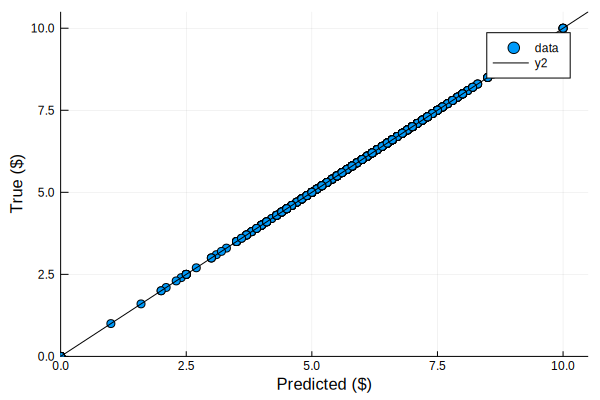

In [78]:
plot_pred_true(test_pred, test_y)